# BGP AS-Level Graph Feature Extraction

This notebook demonstrates how to extract graph-based features from BGP AS_PATH data.

**Key Features:**
- Automatically includes ALL ASes from your data (no missing nodes!)
- Extracts comprehensive graph topology metrics
- Simple, clean usage without complex labeling

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '.')
%load_ext autoreload
%autoreload 2
from graph_feature_extraction import ASGraphFeatureExtractor, extract_features_from_csv

## Step 1: Load Your BGP Data

Load your BGP data that contains AS_PATH information.

In [17]:
# Load your BGP data
# Replace with your actual data file path
csv_path = '/home/smotaali/BGP_Traffic_Generation/RIPE/rrc04_20251116_updates.csv'

df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} BGP updates")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Loaded 17111819 BGP updates

Columns: ['MRT_Type', 'Time', 'Entry_Type', 'Peer_IP', 'Peer_AS', 'Prefix', 'AS_Path', 'Origin_AS', 'Next_Hop', 'Local_Pref', 'MED', 'Community', 'Atomic_Aggregate', 'Aggregator', 'Label']

First few rows:


,MRT_Type,Time,Entry_Type,Peer_IP,Peer_AS,Prefix,AS_Path,Origin_AS,Next_Hop,Local_Pref,MED,Community,Atomic_Aggregate,Aggregator,Label
0,BGP4MP,2025-11-16 00:05:00,A,2001:7f8:1c:24a::201:1,513,2a03:eec0:3212::/48,513 25091 25091 3257 1299 22616,22616,2001:7f8:1c:24a::201:1,0.0,0.0,513:25091 3257:8992 3257:30055 3257:50001 3257...,NAG,NaN,normal
1,BGP4MP,2025-11-16 00:05:00,A,2001:7f8:1c:24a::201:1,513,2a03:eec0:3212::/48,513 29222 29222 174 3356 22616,22616,2001:7f8:1c:24a::201:1,0.0,0.0,174:21100 174:22008 513:29222 29222:100 29222:174,NAG,NaN,normal
2,BGP4MP,2025-11-16 00:05:00,A,2001:7f8:1c:24a::201:1,513,2800:960::/32,513 29222 29222 6939 7303 27768,27768,2001:7f8:1c:24a::201:1,0.0,0.0,513:29222 29222:1000 29222:1003,NAG,NaN,normal
3,BGP4MP,2025-11-16 00:05:00,A,2001:7f8:1c:24a::201:1,513,2800:970::/32,513 29222 29222 6939 7303 27787,27787,2001:7f8:1c:24a::201:1,0.0,0.0,513:29222 29222:1000 29222:1003,NAG,NaN,normal
4,BGP4MP,2025-11-16 00:05:00,A,2001:7f8:1c:24a::201:1,513,2803:1dc0::/32,513 29222 29222 6939 20207,20207,2001:7f8:1c:24a::201:1,0.0,0.0,513:29222 29222:1000 29222:1001,NAG,NaN,normal


## Step 2: Build AS-Level Graph (Basic Usage)

This will automatically extract ALL unique ASes from your data.

In [18]:
# Create extractor
extractor = ASGraphFeatureExtractor()

# Build graph - automatically includes ALL ASes
graph = extractor.build_graph_from_dataframe(
    df,
    as_path_column='AS_Path',
    label_column=None,  # No labeling
    ensure_all_ases=True  # Automatically extract all ASes from data
)

# Display summary
extractor.print_graph_summary()

Graph constructed: 23183 nodes, 49113 edges

📊 AS-Level Graph Summary
Nodes (ASes):      23183
Edges (Links):     49113
Graph Density:     0.0002
Connected:         Yes



## Step 3: Check How Many ASes Were Found

Verify all your ASes are included in the graph.

In [19]:
# Extract all unique ASes from data
all_ases = extractor.extract_all_ases_from_dataframe(df, 'AS_Path')

print(f"Total unique ASes in data: {len(all_ases)}")
print(f"ASes in graph: {graph.number_of_nodes()}")
print(f"\nAll ASes: {all_ases}")

KeyboardInterrupt: 

## Step 4: Extract Basic Graph Metrics

In [ ]:
basic_metrics = extractor.extract_basic_metrics()
print("Basic Graph Metrics:")
for key, value in basic_metrics.items():
    print(f"  {key}: {value}")

Basic Graph Metrics:
  num_nodes: 1491
  num_edges: 4703
  diameter: 10
  num_triangles: 7729


## Step 5: Extract Centrality Metrics

In [ ]:
centrality_metrics = extractor.extract_centrality_metrics()

# Show aggregated metrics (not per-node details)
print("Centrality Metrics:")
for key, value in centrality_metrics.items():
    if not key.endswith('_per_node'):
        print(f"  {key}: {value}")

Centrality Metrics:
  eigenvector_centrality_avg: 0.012543282129892403
  eigenvector_centrality_max: 0.1937581152024351
  harmonic_centrality_avg: 519.6732585992083
  harmonic_centrality_max: 809.8166666666679
  pagerank_avg: 0.0006706908115358819
  pagerank_max: 0.017417269471126647
  degree_centrality_avg: 0.004233904545843292
  degree_centrality_max: 0.12281879194630872
  eccentricity_avg: 7.015425888665325
  eccentricity_max: 10


## Step 6: Extract Connectivity Metrics

In [7]:
connectivity_metrics = extractor.extract_connectivity_metrics()
print("Connectivity Metrics:")
for key, value in connectivity_metrics.items():
    print(f"  {key}: {value}")

Connectivity Metrics:
  algebraic_connectivity: 0.0810021997281584
  node_connectivity: 1
  effective_graph_resistance: 1003732.8332765249
  natural_connectivity: 30.339465789549386


## Step 7: Extract Clustering Metrics

In [8]:
clustering_metrics = extractor.extract_clustering_metrics()
print("Clustering Metrics:")
for key, value in clustering_metrics.items():
    if not key.endswith('_per_node'):
        print(f"  {key}: {value}")

Clustering Metrics:
  assortativity: -0.3285359851588451
  square_clustering_avg: 0.06341151050536799
  square_clustering_max: 0.5833333333333334
  avg_clustering: 0.42738929691030764


## Step 8: Extract Robustness Metrics

In [9]:
robustness_metrics = extractor.extract_robustness_metrics()
print("Robustness Metrics:")
for key, value in robustness_metrics.items():
    print(f"  {key}: {value}")

Robustness Metrics:
  num_components: 1
  largest_component_size: 1491
  num_bridges: 119
  num_articulation_points: 79
  num_spanning_trees: -1
  percolation_threshold: 0.0170052899721942


## Step 9: Extract Advanced Metrics

In [10]:
advanced_metrics = extractor.extract_advanced_metrics()
print("Advanced Metrics:")
for key, value in advanced_metrics.items():
    print(f"  {key}: {value}")

Advanced Metrics:
  symmetry_ratio: 0.5702195104766615
  weighted_spectral_radius: 459.91544927026496
  avg_global_efficiency: 0.3487739990644225
  mean_degree_neighborhood_avg: 77.26411216365496
  mean_degree_neighborhood_max: 183.0
  num_cliques: 2348
  max_clique_size: 22


## Step 10: Extract ALL Features at Once

Get all graph-level features in a single DataFrame row.

In [11]:
# Extract all features
all_features = extractor.extract_all_features()

# Convert to DataFrame for easy viewing
features_df = pd.DataFrame([all_features])

print(f"Total features extracted: {len(features_df.columns)}")
print(f"\nFeature names:")
print(list(features_df.columns))

# Display as transposed table
features_df.T

Extracting basic metrics...
Extracting centrality metrics...
Extracting connectivity metrics...
Extracting clustering metrics...
Extracting robustness metrics...
Extracting advanced metrics...
Total features extracted: 35

Feature names:
['num_nodes', 'num_edges', 'diameter', 'num_triangles', 'eigenvector_centrality_avg', 'eigenvector_centrality_max', 'harmonic_centrality_avg', 'harmonic_centrality_max', 'pagerank_avg', 'pagerank_max', 'degree_centrality_avg', 'degree_centrality_max', 'eccentricity_avg', 'eccentricity_max', 'algebraic_connectivity', 'node_connectivity', 'effective_graph_resistance', 'natural_connectivity', 'assortativity', 'square_clustering_avg', 'square_clustering_max', 'avg_clustering', 'num_components', 'largest_component_size', 'num_bridges', 'num_articulation_points', 'num_spanning_trees', 'percolation_threshold', 'symmetry_ratio', 'weighted_spectral_radius', 'avg_global_efficiency', 'mean_degree_neighborhood_avg', 'mean_degree_neighborhood_max', 'num_cliques', '

,0
num_nodes,1.491000e+03
num_edges,4.703000e+03
diameter,1.000000e+01
num_triangles,7.729000e+03
eigenvector_centrality_avg,1.254328e-02
eigenvector_centrality_max,1.937581e-01
harmonic_centrality_avg,5.196733e+02
harmonic_centrality_max,8.098167e+02
pagerank_avg,6.706908e-04
pagerank_max,1.741727e-02


## Step 11: Extract Per-Node Features

Get detailed metrics for each AS in the graph.

In [12]:
# Extract per-node metrics
node_features = extractor.extract_node_specific_metrics()

print(f"Total nodes with features: {len(node_features)}")
print(f"\nFeature columns: {list(node_features.columns)}")

# Show top 10 nodes by degree
print("\nTop 10 ASes by degree:")
node_features.sort_values('degree', ascending=False).head(10)

Total nodes with features: 1491

Feature columns: ['asn', 'degree', 'harmonic_centrality', 'pagerank', 'eigenvector_centrality', 'eccentricity', 'square_clustering', 'node_clique_number', 'proximity', 'mediation_centrality']

Top 10 ASes by degree:


,asn,degree,harmonic_centrality,pagerank,eigenvector_centrality,eccentricity,square_clustering,node_clique_number,proximity,mediation_centrality
629,32934,183,809.816667,0.017417,0.187834,6,0.035502,22,1.989269,0.096359
16,4637,177,807.733333,0.016211,0.193758,6,0.039195,22,1.989940,0.082451
31,9304,173,802.483333,0.015997,0.184678,6,0.037147,22,2.004695,0.087699
29,8928,171,802.566667,0.015612,0.185742,6,0.038254,22,2.002012,0.076650
125,15169,167,798.483333,0.015810,0.180153,6,0.037117,22,2.013414,0.084158
294,20940,164,799.066667,0.015094,0.180108,6,0.037901,22,2.006707,0.075098
4,1273,163,795.350000,0.015798,0.156166,6,0.030159,22,2.021462,0.097564
30,9002,160,796.150000,0.014706,0.177580,6,0.038301,22,2.013414,0.071449
6,2497,156,794.733333,0.014461,0.175308,6,0.038867,22,2.014085,0.074462
15,4323,156,793.233333,0.014249,0.173532,6,0.038187,22,2.020121,0.069305


## Step 12: Save Features to CSV

Export both graph-level and per-node features.

In [ ]:
# Save graph-level features
features_df.to_csv('/home/smotaali/BGP_Traffic_Generation/results/graph_features_bgp_updates_analysis_20251208_172321.csv', index=False)
print("✅ Graph-level features saved to: ../Data_Set/graph_features.csv")

# Save per-node features
node_features.to_csv('/home/smotaali/BGP_Traffic_Generation/results/node_features_bgp_updates_analysis_20251208_172321.csv', index=False)
print("✅ Per-node features saved to: ../Data_Set/node_features.csv")

✅ Graph-level features saved to: ../Data_Set/graph_features.csv
✅ Per-node features saved to: ../Data_Set/node_features.csv


## Quick Usage: One-Liner Approach

If you just want to quickly extract features from a CSV file:

In [15]:
# One-liner to extract all features
features_quick = extract_features_from_csv(
    csv_path,
    as_path_column='AS_Path',
    label_column=None,  # No labeling
    ensure_all_ases=True,  # Include all ASes
    print_summary=True,  # Show summary
    output_csv='/home/smotaali/BGP_Traffic_Generation/results/graph_features_quick.csv'
)

print(f"\nExtracted {features_quick.shape[1]} features")
features_quick.T.head(20)

Graph constructed: 21 nodes, 31 edges

📊 AS-Level Graph Summary
Nodes (ASes):      21
Edges (Links):     31
Graph Density:     0.1476
Connected:         No
Components:        2
Largest Component: 20 nodes

Extracting basic metrics...
Extracting centrality metrics...
Extracting connectivity metrics...
Extracting clustering metrics...
Extracting robustness metrics...
Extracting advanced metrics...
Graph features saved to /home/smotaali/BGP_Traffic_Generation/results/graph_features_quick.csv

Extracted 35 features


,0
num_nodes,21.000000
num_edges,31.000000
diameter,6.000000
num_triangles,9.000000
eigenvector_centrality_avg,0.175540
eigenvector_centrality_max,0.603481
harmonic_centrality_avg,9.566667
harmonic_centrality_max,16.083333
pagerank_avg,0.050000
pagerank_max,0.222218


In [13]:

from pyvis.network import Network
import networkx as nx

# Create interactive visualization with PyVis
def visualize_as_graph_pyvis(graph, output_file='as_graph.html', height='750px', width='100%'):
    """
    Create interactive AS graph visualization using PyVis.
    
    Args:
        graph: NetworkX graph object
        output_file: Output HTML file name
        height: Height of visualization
        width: Width of visualization
    """
    # Create PyVis network
    net = Network(height=height, width=width, notebook=True, 
                  bgcolor='#222222', font_color='white')
    
    # Physics settings for better layout
    net.barnes_hut(gravity=-8000, central_gravity=0.3, spring_length=100, 
                   spring_strength=0.001, damping=0.09)
    
    # Add nodes with colors based on degree (importance)
    degrees = dict(graph.degree())
    max_degree = max(degrees.values()) if degrees else 1
    
    for node in graph.nodes():
        degree = degrees[node]
        # Size based on degree
        size = 10 + (degree / max_degree) * 40
        
        # Color based on degree (gradient from blue to red)
        color_intensity = int((degree / max_degree) * 255)
        color = f'#{255-color_intensity:02x}{color_intensity//2:02x}{color_intensity:02x}'
        
        # Add node
        net.add_node(node, 
                    label=f'AS{node}',
                    title=f'AS{node}\nDegree: {degree}',
                    size=size,
                    color=color)
    
    # Add edges
    for edge in graph.edges():
        net.add_edge(edge[0], edge[1], color='#666666', width=2)
    
    # Show buttons for interaction
    net.show_buttons(filter_=['physics', 'interaction'])
    
    # Save and display
    net.show(output_file)
    print(f"✅ Interactive visualization saved to: {output_file}")
    print(f"   Open it in your browser to interact with the graph!")
    
    return net

# Create visualization
print("Creating interactive PyVis visualization...")
vis = visualize_as_graph_pyvis(graph, output_file='/home/smotaali/BGP_Traffic_Generation/results/as_graph_interactive_bgp_updates_analysis_20251208_172321.html')

Creating interactive PyVis visualization...
/home/smotaali/BGP_Traffic_Generation/results/as_graph_interactive_bgp_updates_analysis_20251208_172321.html
✅ Interactive visualization saved to: /home/smotaali/BGP_Traffic_Generation/results/as_graph_interactive_bgp_updates_analysis_20251208_172321.html
   Open it in your browser to interact with the graph!


In [ ]:
# Advanced PyVis visualization with node categories

def visualize_as_graph_advanced(graph, topology_ases=None, output_file='as_graph_advanced.html'):
    """
    Advanced visualization with node categorization.
    
    Args:
        graph: NetworkX graph
        topology_ases: List of ASes from original topology (to distinguish from attack ASes)
        output_file: Output HTML file
    """
    from pyvis.network import Network
    
    net = Network(height='800px', width='100%', notebook=True,
                  bgcolor='#ffffff', font_color='black')
    
    # Configure physics
    net.barnes_hut(gravity=-5000, central_gravity=0.3, spring_length=150)
    
    # Calculate node metrics
    degrees = dict(graph.degree())
    max_degree = max(degrees.values()) if degrees else 1
    
    # Betweenness centrality (importance in routing)
    try:
        betweenness = nx.betweenness_centrality(graph)
    except:
        betweenness = {n: 0 for n in graph.nodes()}
    
    # Categorize nodes
    for node in graph.nodes():
        degree = degrees[node]
        bc = betweenness.get(node, 0)
        
        # Determine node type
        if topology_ases is not None:
            is_legitimate = node in topology_ases
        else:
            is_legitimate = True
        
        # Size based on degree
        size = 15 + (degree / max_degree) * 35
        
        # Color based on type and centrality
        if not is_legitimate:
            # Attack/injected ASes - RED
            color = '#FF0000'
            shape = 'diamond'
            title = f'⚠️ AS{node} (INJECTED)\nDegree: {degree}\nBetweenness: {bc:.4f}'
        elif degree >= max_degree * 0.7:
            # High degree (Tier1/Tier2) - BLUE
            color = '#0066CC'
            shape = 'dot'
            title = f'AS{node} (HIGH DEGREE)\nDegree: {degree}\nBetweenness: {bc:.4f}'
        elif bc >= 0.1:
            # High betweenness (important for routing) - GREEN
            color = '#00CC66'
            shape = 'dot'
            title = f'AS{node} (HIGH BETWEENNESS)\nDegree: {degree}\nBetweenness: {bc:.4f}'
        else:
            # Regular nodes - GRAY
            color = '#999999'
            shape = 'dot'
            title = f'AS{node}\nDegree: {degree}\nBetweenness: {bc:.4f}'
        
        net.add_node(node,
                    label=f'AS{node}',
                    title=title,
                    size=size,
                    color=color,
                    shape=shape)
    
    # Add edges with weights
    for u, v in graph.edges():
        net.add_edge(u, v, color='#cccccc', width=1.5)
    
    # Add legend
    net.add_node('legend_tier1', label='High Degree', color='#0066CC', 
                size=20, x=-1000, y=-500, physics=False, shape='dot')
    net.add_node('legend_betw', label='High Betweenness', color='#00CC66', 
                size=20, x=-1000, y=-400, physics=False, shape='dot')
    net.add_node('legend_attack', label='Injected AS', color='#FF0000', 
                size=20, x=-1000, y=-300, physics=False, shape='diamond')
    
    net.show_buttons(filter_=['physics'])
    net.show(output_file)
    
    print(f"✅ Advanced visualization saved to: {output_file}")
    print(f"\n📊 Legend:")
    print(f"   🔵 Blue dots = High degree nodes (Tier1/Tier2)")
    print(f"   🟢 Green dots = High betweenness (important for routing)")
    print(f"   🔴 Red diamonds = Injected/Attack ASes")
    print(f"   ⚪ Gray dots = Regular nodes")
    
    return net

# Create advanced visualization
print("Creating advanced PyVis visualization...")
# If you have topology_ases defined, pass it here:
# vis_adv = visualize_as_graph_advanced(graph, topology_ases=topology_ases, 
#                                       output_file='../Data_Set/as_graph_advanced.html')
vis_adv = visualize_as_graph_advanced(graph, output_file='/home/smotaali/BGP_Traffic_Generation/results/as_graph_advanced_20251208_172321_.html')


Creating advanced PyVis visualization...
/home/smotaali/BGP_Traffic_Generation/results/as_graph_advanced.html
✅ Advanced visualization saved to: /home/smotaali/BGP_Traffic_Generation/results/as_graph_advanced.html

📊 Legend:
   🔵 Blue dots = High degree nodes (Tier1/Tier2)
   🟢 Green dots = High betweenness (important for routing)
   🔴 Red diamonds = Injected/Attack ASes
   ⚪ Gray dots = Regular nodes


In [14]:
# Export graph for Gephi visualization

def export_for_gephi(graph, output_file='as_graph.gexf', include_metrics=True):
    """
    Export AS graph to GEXF format for Gephi.
    
    Args:
        graph: NetworkX graph
        output_file: Output GEXF file path
        include_metrics: If True, include node metrics as attributes
    """
    import networkx as nx
    
    # Create a copy of the graph to add attributes
    G = graph.copy()
    
    if include_metrics:
        print("Calculating node metrics for Gephi...")
        
        # Calculate various metrics
        degrees = dict(G.degree())
        
        try:
            betweenness = nx.betweenness_centrality(G)
        except:
            betweenness = {n: 0 for n in G.nodes()}
        
        try:
            closeness = nx.closeness_centrality(G)
        except:
            closeness = {n: 0 for n in G.nodes()}
        
        try:
            pagerank = nx.pagerank(G)
        except:
            pagerank = {n: 1.0/G.number_of_nodes() for n in G.nodes()}
        
        try:
            clustering = nx.clustering(G)
        except:
            clustering = {n: 0 for n in G.nodes()}
        
        # Add metrics as node attributes
        for node in G.nodes():
            G.nodes[node]['degree'] = degrees.get(node, 0)
            G.nodes[node]['betweenness'] = betweenness.get(node, 0)
            G.nodes[node]['closeness'] = closeness.get(node, 0)
            G.nodes[node]['pagerank'] = pagerank.get(node, 0)
            G.nodes[node]['clustering'] = clustering.get(node, 0)
            G.nodes[node]['label'] = f'AS{node}'
    
    # Export to GEXF
    nx.write_gexf(G, output_file)
    
    print(f"\n✅ Graph exported to Gephi format: {output_file}")
    print(f"\n📖 How to use in Gephi:")
    print(f"   1. Open Gephi (download from: https://gephi.org/)")
    print(f"   2. File → Open → Select '{output_file}'")
    print(f"   3. Use 'ForceAtlas 2' layout for best results")
    print(f"   4. Color nodes by: degree, betweenness, or pagerank")
    print(f"   5. Resize nodes by: degree or betweenness")
    print(f"\n📊 Node attributes included:")
    print(f"   - degree: Number of connections")
    print(f"   - betweenness: Routing importance")
    print(f"   - closeness: Average distance to other nodes")
    print(f"   - pagerank: Overall importance score")
    print(f"   - clustering: Local clustering coefficient")

# Export for Gephi
export_for_gephi(graph, output_file='/home/smotaali/BGP_Traffic_Generation/results/as_graph_20251208_172321.gexf', include_metrics=True)


Calculating node metrics for Gephi...

✅ Graph exported to Gephi format: /home/smotaali/BGP_Traffic_Generation/results/as_graph_20251208_172321.gexf

📖 How to use in Gephi:
   1. Open Gephi (download from: https://gephi.org/)
   2. File → Open → Select '/home/smotaali/BGP_Traffic_Generation/results/as_graph_20251208_172321.gexf'
   3. Use 'ForceAtlas 2' layout for best results
   4. Color nodes by: degree, betweenness, or pagerank
   5. Resize nodes by: degree or betweenness

📊 Node attributes included:
   - degree: Number of connections
   - betweenness: Routing importance
   - closeness: Average distance to other nodes
   - pagerank: Overall importance score
   - clustering: Local clustering coefficient


Calculating layout (this may take a moment)...
✅ Preview saved to: ../Data_Set/as_graph_preview.png


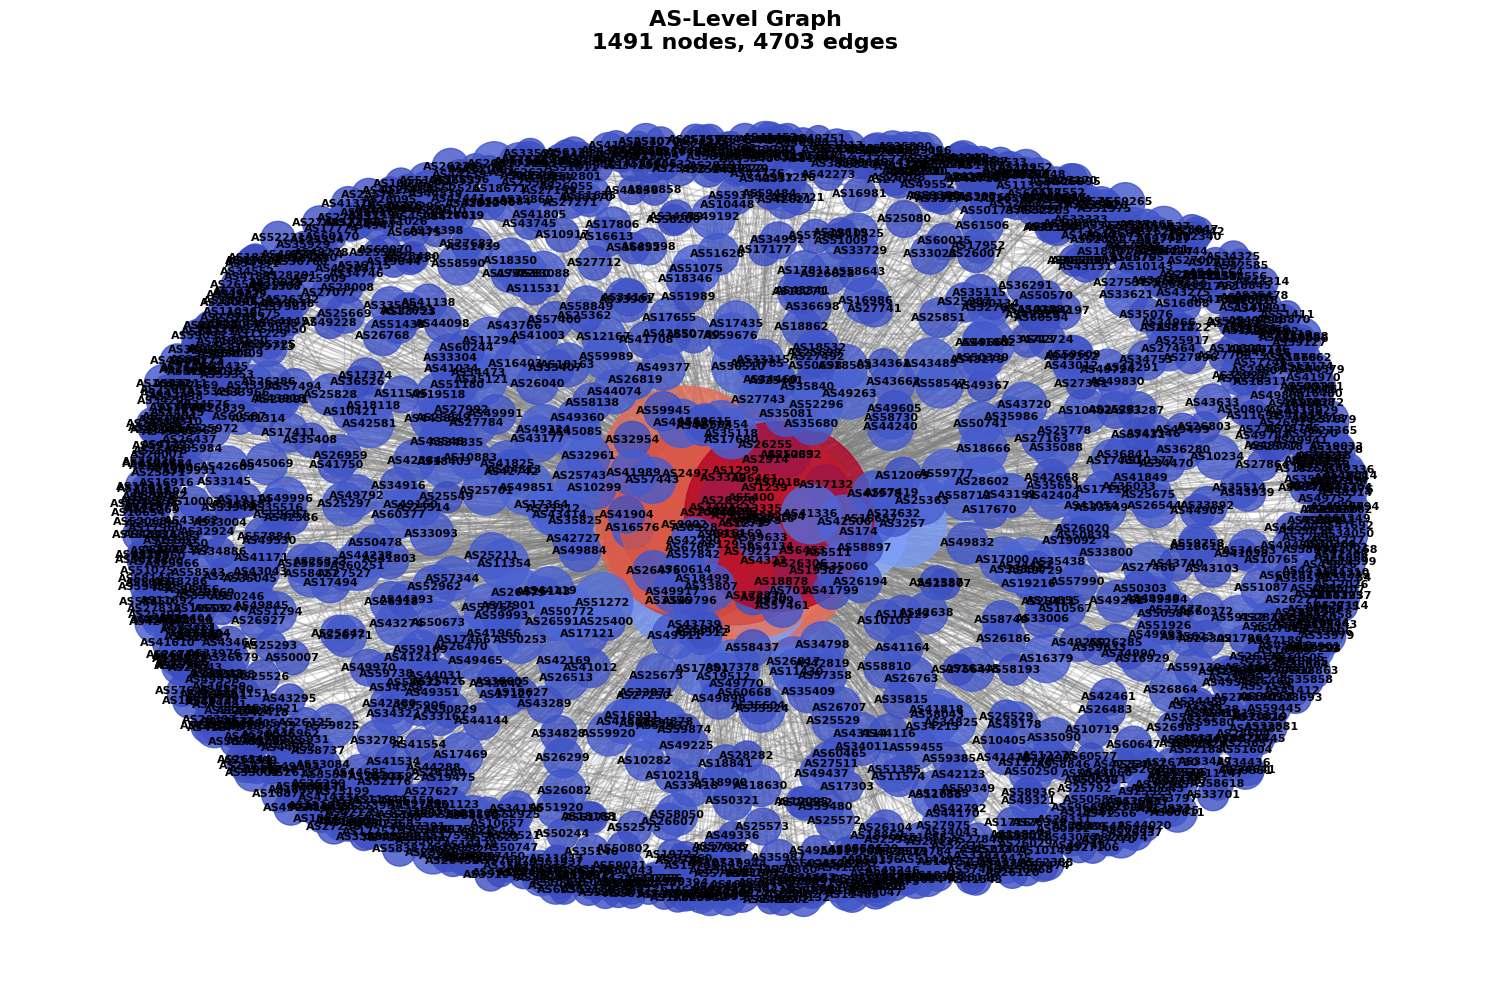

In [15]:
# Quick static visualization with matplotlib

import matplotlib.pyplot as plt
import networkx as nx

def quick_preview(graph, figsize=(15, 10)):
    """
    Quick matplotlib preview of the graph.
    
    Args:
        graph: NetworkX graph
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    
    # Calculate layout
    print("Calculating layout (this may take a moment)...")
    pos = nx.spring_layout(graph, k=0.5, iterations=50, seed=42)
    
    # Node sizes based on degree
    degrees = dict(graph.degree())
    node_sizes = [300 + degrees[node] * 100 for node in graph.nodes()]
    
    # Node colors based on degree
    node_colors = [degrees[node] for node in graph.nodes()]
    
    # Draw the graph
    nx.draw_networkx_nodes(graph, pos, 
                          node_size=node_sizes,
                          node_color=node_colors,
                          cmap=plt.cm.coolwarm,
                          alpha=0.8)
    
    nx.draw_networkx_edges(graph, pos, 
                          alpha=0.3,
                          edge_color='gray',
                          width=1)
    
    nx.draw_networkx_labels(graph, pos, 
                           labels={n: f'AS{n}' for n in graph.nodes()},
                           font_size=8,
                           font_weight='bold')
    
    plt.title(f'AS-Level Graph\n{graph.number_of_nodes()} nodes, {graph.number_of_edges()} edges', 
             fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    
    # Save
    plt.savefig('/home/smotaali/BGP_Traffic_Generation/results/as_graph_preview_20251208_172321.png', dpi=150, bbox_inches='tight')
    print(f"✅ Preview saved to: ../Data_Set/as_graph_preview.png")
    
    plt.show()

# Create preview
quick_preview(graph)


## Summary

**What you learned:**
1. ✅ How to build AS-level graphs that include ALL ASes
2. ✅ How to extract comprehensive graph metrics
3. ✅ How to get per-node features for detailed analysis
4. ✅ How to save features for machine learning

**Key takeaway:** The graph now automatically includes all ASes from your data - no more missing nodes!